In [1]:
import rioxarray as rxr
import os, sys
from glob import glob
from shapely import Polygon
import geopandas as gpd
import earthpy.spatial as es
import earthpy.plot as ep
import xarray as xr

In [20]:
stack = rxr.open_rasterio("sentinel_cropped_stacked.tif")

In [22]:
def norm_diff(band1, band2):
    return (band1 - band2) / (band1 + band2)

In [24]:
# Change to reflectances
# Note that this is currently TOA reflectances - you could think about getting BOA reflectances by using sen2cor software
# Could experiment with Acolite: https://github.com/acolite/acolite
# Alternatively, try to get L2A data from Sentinel 2
stack = stack / 10000

In [ ]:
# In situ data for this area
# https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=8898098

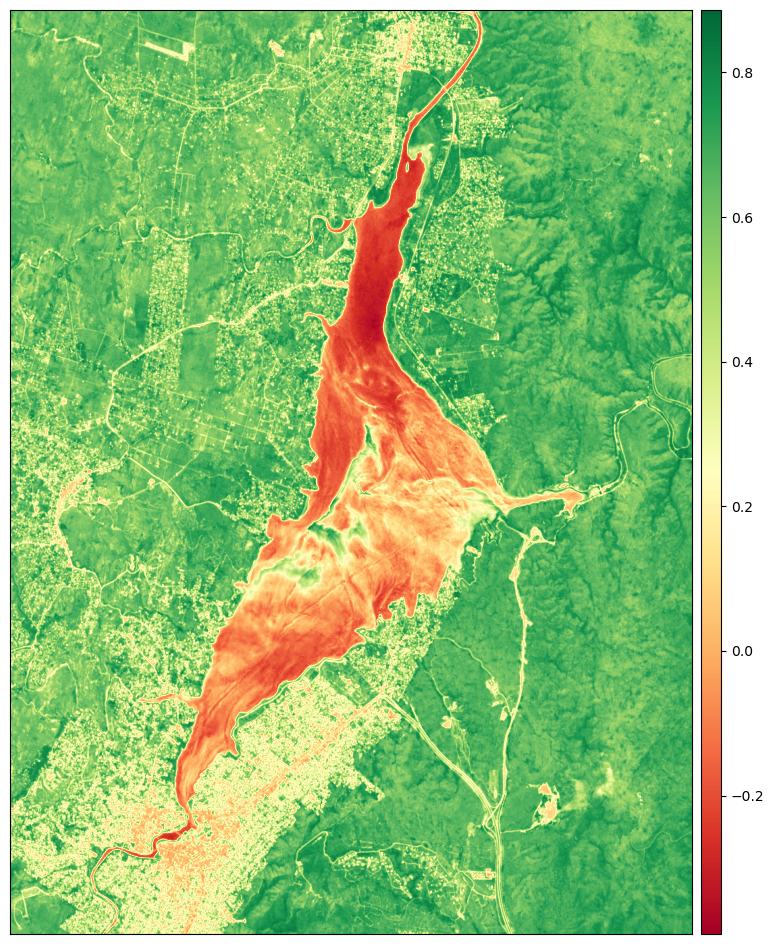

<Axes: >

In [32]:
# Remember that everything is -1 from actual band number
ndvi = norm_diff(stack[7], stack[3])

ep.plot_bands(ndvi, cmap = "RdYlGn")

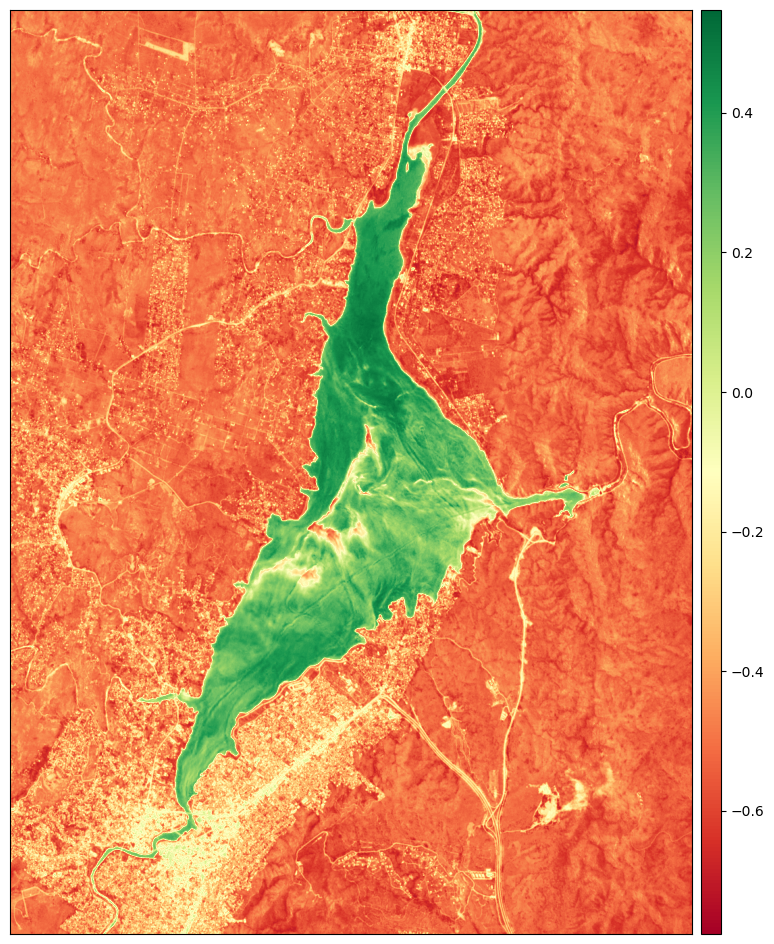

<Axes: >

In [33]:
# Remember that everything is -1 from actual band number
ndwi = norm_diff(stack[2], stack[7])

ep.plot_bands(ndwi, cmap = "RdYlGn")

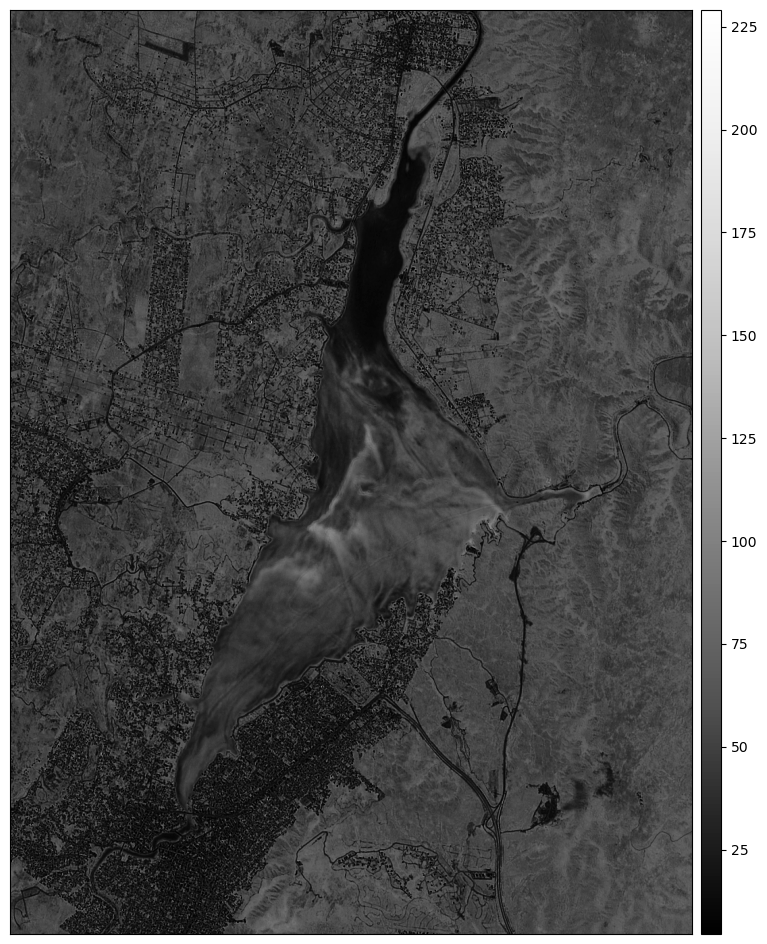

<Axes: >

In [34]:
# Chlorophyll spectral index - known to not always be super good
# https://www.sciencedirect.com/science/article/pii/S1470160X20308141?via%3Dihub
x = norm_diff(stack[4], stack[3])

chloro = 14.039 + 86.115*x + 194.325*x**2

ep.plot_bands(chloro)

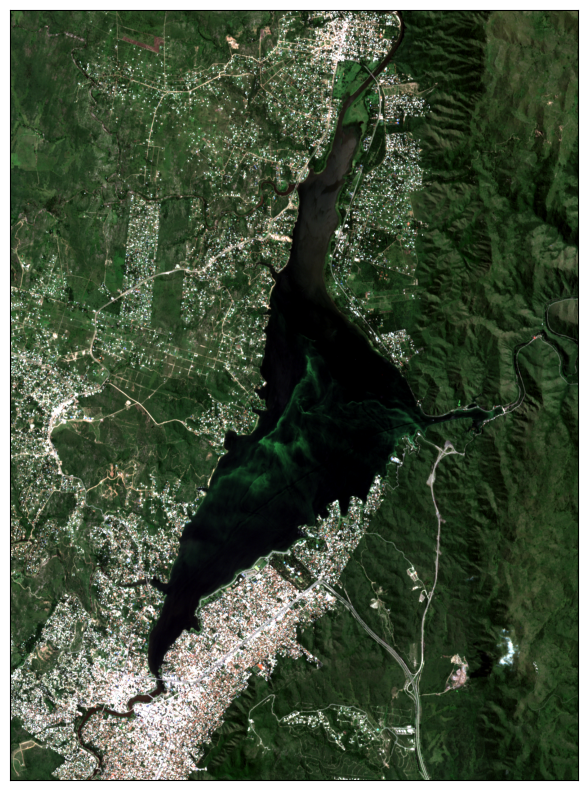

<Axes: >

In [29]:
ep.plot_rgb(stack.data, rgb = (3,2,1), stretch = True)

In [12]:
# # Create study area polygon
# polygon_dict = {"type":"Polygon","coordinates":[[[-64.600983,-31.455025],[-64.600983,-31.290287],[-64.35585,-31.290287],[-64.35585,-31.455025],[-64.600983,-31.455025]]]}

# polygon = Polygon(polygon_dict["coordinates"][0])

# gdf = gpd.GeoDataFrame(geometry = [polygon], crs = "EPSG:4326")

# gdf.to_file('study_area.geojson', driver = 'GeoJSON')

In [13]:
# # Check CRS of raster
# crs = es.crs_check('Sentinel2\\S2A_MSIL1C_20170222T142031_N0204_R010_T20JLL_20170222T142357.SAFE\\GRANULE\\L1C_T20JLL_A008730_20170222T142357\\IMG_DATA\\T20JLL_20170222T142031_B01.jp2')

# # Convert to appropriate CRS
# gdf_reproj = gdf.to_crs(crs)

In [14]:
# # Using rioxarray to open a set of bands
# filepaths = glob(
#     os.path.join(
#         'Sentinel2',
#         'S2A_MSIL1C_20170222T142031_N0204_R010_T20JLL_20170222T142357.SAFE',
#         'GRANULE',
#         'L1C_T20JLL_A008730_20170222T142357',
#         'IMG_DATA',
#         '*B*.jp2'
#     )
# )

# filepaths

In [15]:
# band_list = list()
# band_name = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "8A"]

# for idx, file in enumerate(filepaths):
#     with rxr.open_rasterio(file).rio.clip(gdf_reproj.geometry, from_disk = True).squeeze() as ds:
#     # with rxr.open_rasterio(file) as ds:
#         # Squeeze the raster into a 2D image
#         band_list.append(ds)
#         # Rename the band names - this is super helpful! It keeps track of what band is which
#         # band_list[-1]["band"] = band_name[idx]

In [16]:
# NOTE: This did not work because rioxarray resampling is quite unusual and doesn't fully work right
# stack_clipped = xr.concat(band_list, dim = "band")

# stack_clipped

In [17]:
# test = rxr.open_rasterio('Sentinel2\\S2A_MSIL1C_20170222T142031_N0204_R010_T20JLL_20170222T142357.SAFE\\GRANULE\\L1C_T20JLL_A008730_20170222T142357\\IMG_DATA\\T20JLL_20170222T142031_B01.jp2')

# test[0:100, 0:100].data

In [18]:
# ep.plot_bands(stack_clipped)